# 吴恩达深度学习第三周编程作业

##  单隐层平面数据分类

### 题目英文原文

#### Planar data classification with one hidden layer

Welcome to your week 3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation


题目要求： 
1. 建立一个单隐层神经网络，实现平面数据分类（二分类）
2. 使用具有非线性性质的激活函数 例如： tanh   
3. 计算交叉熵损失
4. 实现正向传播和反向传播

相关资料见网盘 --> [陈能豆](https://pan.baidu.com/s/1oVWgKw0oE1lpc4zys0FnJg) 提取码：hwwn

#### 对于代码中用到的来自文件导入的方法，以Markdown的形式给予展示

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *   # 导入该文件的所有方法
import sklearn
import sklearn.datasets 
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets 
# 导入相关包和  文件内的方法

np.random.seed(1)   
# 设置固定的随机种子，保证加下来每一步生成的结果是和你是一致的


常用的包就不介绍了，  
testCases ： 提供代码中用到的一些测试示例  
planar_utils ： 提供了部分代码中要用到的函数  
下面具体用到的地方会附加注释

```python
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y
```

In [3]:
X , Y = load_planar_dataset() # 读入数据  函数来自 planar_utils  实现见紧挨着的md

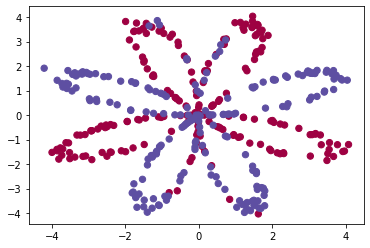

In [4]:
# plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral) #绘制散点图

# 如果上一语句如出现问题，请使用下面的语句：，在我的电脑上是都可以的😁
plt.scatter( X[0, : ] , X[1, : ] , c=np.squeeze(Y) , s=40 , cmap=plt.cm.Spectral ) #绘制散点图


In [5]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # 训练集数据的数量

print ("X的维度为: " + str(shape_X))
print ("Y的维度为: " + str(shape_Y))
print ("数据集里面的数据有：" + str(m) + " 个")


X的维度为: (2, 400)
Y的维度为: (1, 400)
数据集里面的数据有：400 个


In [6]:
# 这里查看一下X Y 
print(X)
print(Y)

[[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.51303563e+00
  -3.52018

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()# 调用包，训练逻辑回归模型
clf.fit(X.T,Y.T)


/Users/chenchangming/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenchangming/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


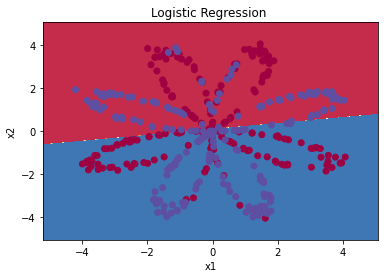

In [19]:
plot_decision_boundary( lambda x: clf.predict(x), X , Y )
plt.title( "Logistic Regression " )# 标题

LR_predictions  = clf.predict(X.T) #预测结果
    
print( "逻辑回归的准确性： %d " % float(  (np.dot(Y,LR_predictions) +
    np.dot(1-Y , 1-LR_predictions) )/float(Y.size) * 100  ) + 
     "% "+"(正确标记的数据点所占的百分比)" )



###  神经网络模型

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
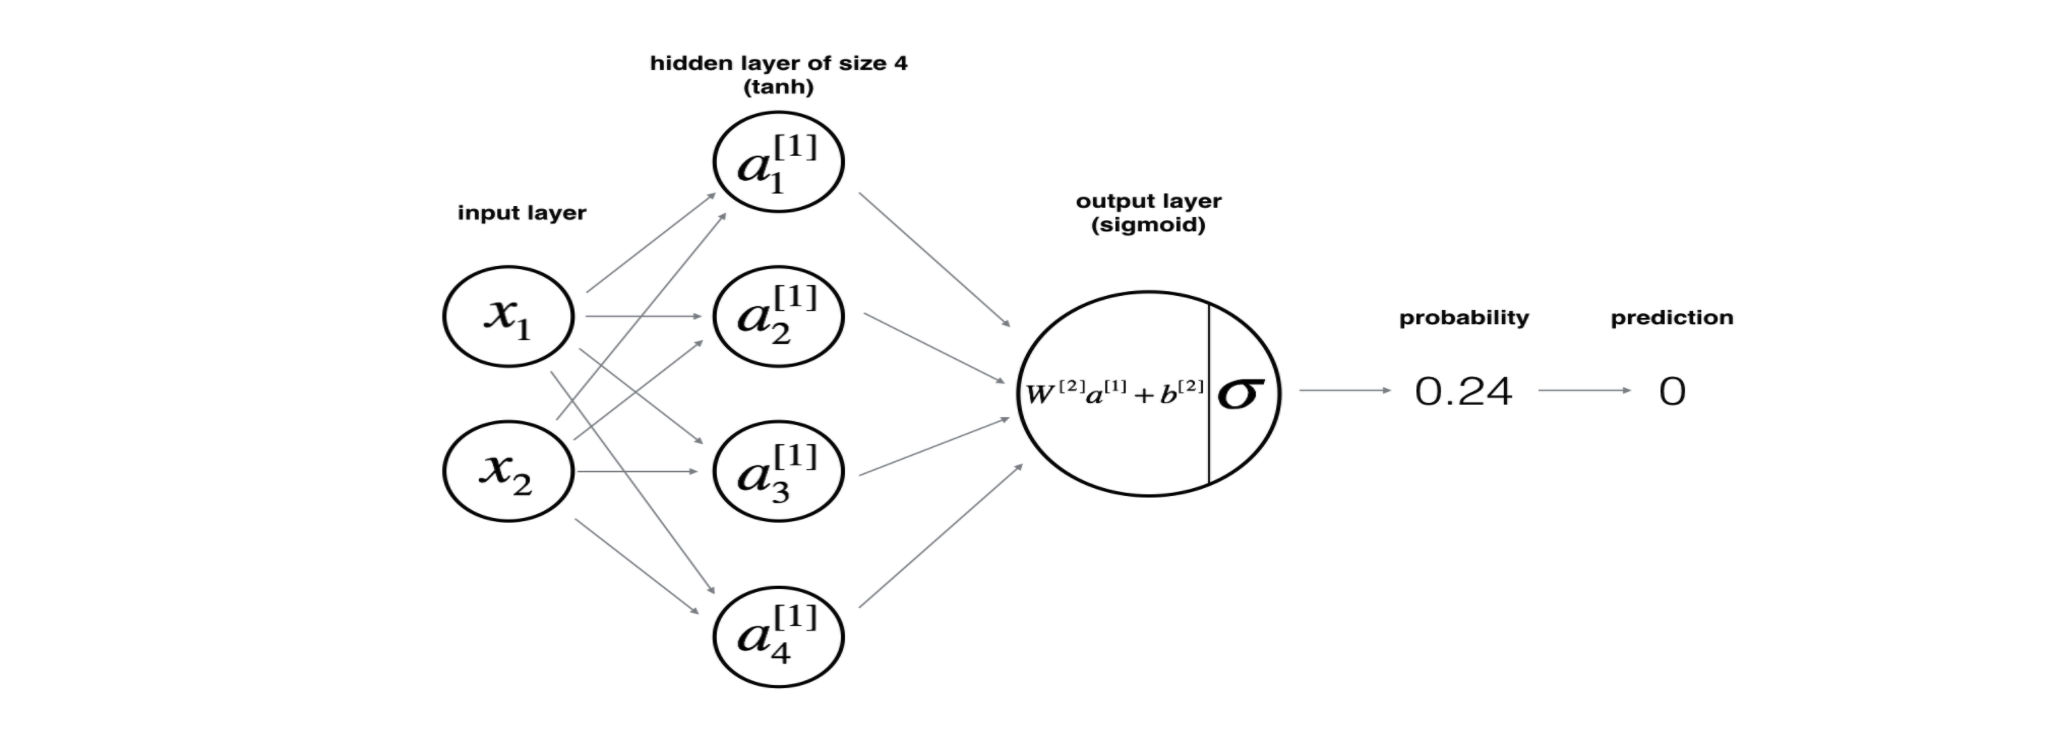

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

#### 上面给出了本题的模型 和注意事项：  
**提醒**：建立神经网络的一般方法是：

1.定义神经网络结构（输入单元的#和隐藏单元的#等）。

2.初始化模型参数

3.循环：

-实现前向传播

-计算损失

-实现反向传播以获得梯度

-更新参数（梯度下降）

你要构建函数来计算步骤1-3，然后将它们合并到一个我们称为`nn_model()`的函数中。构建了`nn_model()`并学习了正确的参数，就可以对新数据进行预测。

In [20]:
def layer_sizes(X , Y):  # 本次题目使用的是 双层神经网络， 只需配置一个隐藏层即可。 
    """
    输入  输入数据集： X ， 输出标签 ： Y
    
    返回 输入层，隐藏层，输出层的单元数(节点数)   表示为: (n_x , n_h , n_y) 
    """
    
    n_x = X.shape[0]# 输入层  X.shape = (n_x , m)
    n_h = 4     # 初始化默认为4
    n_y = Y.shape[0]# Y 是0/1标签   故： y.shape = (1,m)
    
    
    # 返回
    return (n_x , n_h , n_y)

```python
def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
```


In [21]:
#测试layer_sizes
print("=========================测试layer_sizes=========================")
X_asses , Y_asses = layer_sizes_test_case() #  此方法在  from testCases import * 这里提到的文件了有定义  上方md给出该方法的代码展示
(n_x,n_h,n_y) =  layer_sizes(X_asses,Y_asses)
print("X =  "+str(X_asses))
print("X.shape =  "+str( X_asses.shape ))
print("Y =  "+str(X_asses))
print("Y.shape =  "+str( Y_asses.shape ))

print("输入层的节点数量为: n_x = " + str(n_x))
print("隐藏层的节点数量为: n_h = " + str(n_h))
print("输出层的节点数量为: n _y = " + str(n_y))

# 显示  X Y  以及其 维度

=========================测试layer_sizes=========================
X =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
X.shape =  (5, 3)
Y =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
Y.shape =  (2, 3)
输入层的节点数量为: n_x = 5
隐藏层的节点数量为: n_h = 4
输出层的节点数量为: n _y = 2


In [22]:
def initialize_parameters( n_x , n_h , n_y ): 
    # 功能  初始化参数
    """ 
     参数： 
         n_x : 输入层节点数
         n_h : 隐藏层节点数
         n_y : 输出层节点数
     
     返回值： 
     parameters : 字典： 内包含参数： 
         W1 : 权重矩阵，维度为( n_h , n_x )
         b1 : 偏向量， 维度为( n_h , 1 )
         W2 : 权重矩阵, 维度为( n_y , n_h )
         b2 : 偏向量， 维度为( n_y , 1 )
    """ 
     
     # 随机初始化参数
    np.random.seed(2) # 指定随机种子  ， 以便你的结果和我的一样
    W1 = np.random.randn( n_h , n_x ) * 0.01
    b1 = np.zeros( (n_h , 1) )
    W2 = np.random.randn( n_y , n_h ) * 0.01
    b2 = np.zeros( (n_y , 1) )
    
    # 断言确保矩阵维度 
    assert(W1.shape == ( n_h , n_x ))
    assert(b1.shape == ( n_h ,1 ) )
    assert(W2.shape == ( n_y , n_h )) 
    assert(b2.shape == ( n_y , 1 ))
    
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2, 
        "b2" : b2
    }
    
    return parameters
    
        

```python
def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y
```

In [23]:
#测试initialize_parameters
print("=========================测试initialize_parameters=========================")    
n_x , n_h , n_y = initialize_parameters_test_case() # 此方法来自 from testCases import * 的文件里的定义  代码展示在上方
parameters = initialize_parameters(n_x , n_h , n_y)
print ("n_x = "+ str(n_x))
print ("n_h = "+ str(n_h))
print ("n_y = "+ str(n_y))

print("W1.shape = "+str(parameters["W1"].shape))
print("b1.shape = "+str(parameters["b1"].shape))
print("W2.shape = "+str(parameters["W2"].shape))
print("b2.shape = "+str(parameters["b2"].shape))
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



=========================测试initialize_parameters=========================
n_x = 2
n_h = 4
n_y = 1
W1.shape = (4, 2)
b1.shape = (4, 1)
W2.shape = (1, 4)
b2.shape = (1, 1)
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


####  sigmoid 函数也来自文件读入： 
```python
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
```

In [33]:
def foward_propagation( X , parameters ): 
    # 前向传播的公式 见前面的模型概述
    """
    参数： 
        X : 维度为( n_x , m ) 的输入数据 ， 或者说数据集
        parameters : 已经初始化的参数 ， 由initialize_parameters 得出
    
    返回值： 
        A2 : 使用sigmod函数 作为激活函数得出的数值 ， 这里可理解为 最终 输出层的输出
        cache : 字典 ，包含: 前向传播计算过程中的 "Z1" , "A1" , "Z2" , "A2"
    """
    
    # 取出参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 前向传播
    Z1 = np.dot( W1 , X ) + b1
    A1 = np.tanh(Z1) # 这里用的是  tanh 激活函数
    Z2 = np.dot( W2 , A1 ) + b2
    A2 = sigmoid(Z2)  # 方法由文件读入
    
    assert( A2.shape == ( 1,X.shape[1]) )
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    
    return ( A2 , cache )

```python
def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    return X_assess, parameters
```

In [34]:
#测试forward_propagation
print("=========================测试forward_propagation=========================") 
X_assess, parameters = forward_propagation_test_case()
A2, cache = foward_propagation(X_assess, parameters)
print(np.mean(cache["Z1"]), np.mean(cache["A1"]), np.mean(cache["Z2"]), np.mean(cache["A2"]))
# np.mean 求均值  
# 展示数值
# print( "Z1 = "+str(cache["Z1"]))
# print("A1 = "+str(cache["A1"]))
# print("Z2 = " +str(cache["Z2"]))
# print( "A2 = "+str(cache["A2"]))

=========================测试forward_propagation=========================
-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431


#####  这里简单演示一下 multiply的用法 ，  已经了解的请略过这一部分

In [35]:
logprobs = np.multiply(np.log(A2.T),Y)  # 对应位置相乘   输出与相乘数组/矩阵的大小一致  运用到了python的广播
cost = - np.sum(logprobs)                # 不需要使用循环就可以直接算出来。
print("A2.T.shape = " +str(A2.T.shape)) 
print("Y.shape = "+str(Y.shape))
print("logprobs.shape = "+str(logprobs.shape) )
cost

A2.T.shape = (3, 1)
Y.shape = (1, 400)
logprobs.shape = (3, 400)


415.7569043906405

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{cost}$$

In [36]:
def compute_cost (A2 , Y , parameters): 
    """
    计算成本 即：cost
    
    参数： 
        A2 : sigmoid函数计算得出的输出层激活值 
        Y : 数据集中的标签集， 或者说 答案集
        parameters : 字典， 包含W1 , B1 , W2 , B2
    
    返回值： 
        成本( coat )
    """
    
    m = Y.shape[1]
    
    # 计算cost
    logprobs = np.multiply( np.log(A2) , Y  ) + np.multiply( ( 1-Y ) , np.log( 1-A2 ) )
    cost = -np.sum(logprobs) / m
    cost = float( np.squeeze(cost) )
    
    assert( isinstance( cost , float ) )
    
    return cost
    
    

```python
def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))

    return a2, Y_assess, parameters
```

In [37]:
#测试compute_cost
print("=========================测试compute_cost=========================") 
A2 , Y_assess , parameters = compute_cost_test_case()  # 测试数据来自 testCases  见上方md
print("cost = " + str(compute_cost(A2,Y_assess,parameters)))


=========================测试compute_cost=========================
cost = 0.6929198937761266


#### 反向传播公式
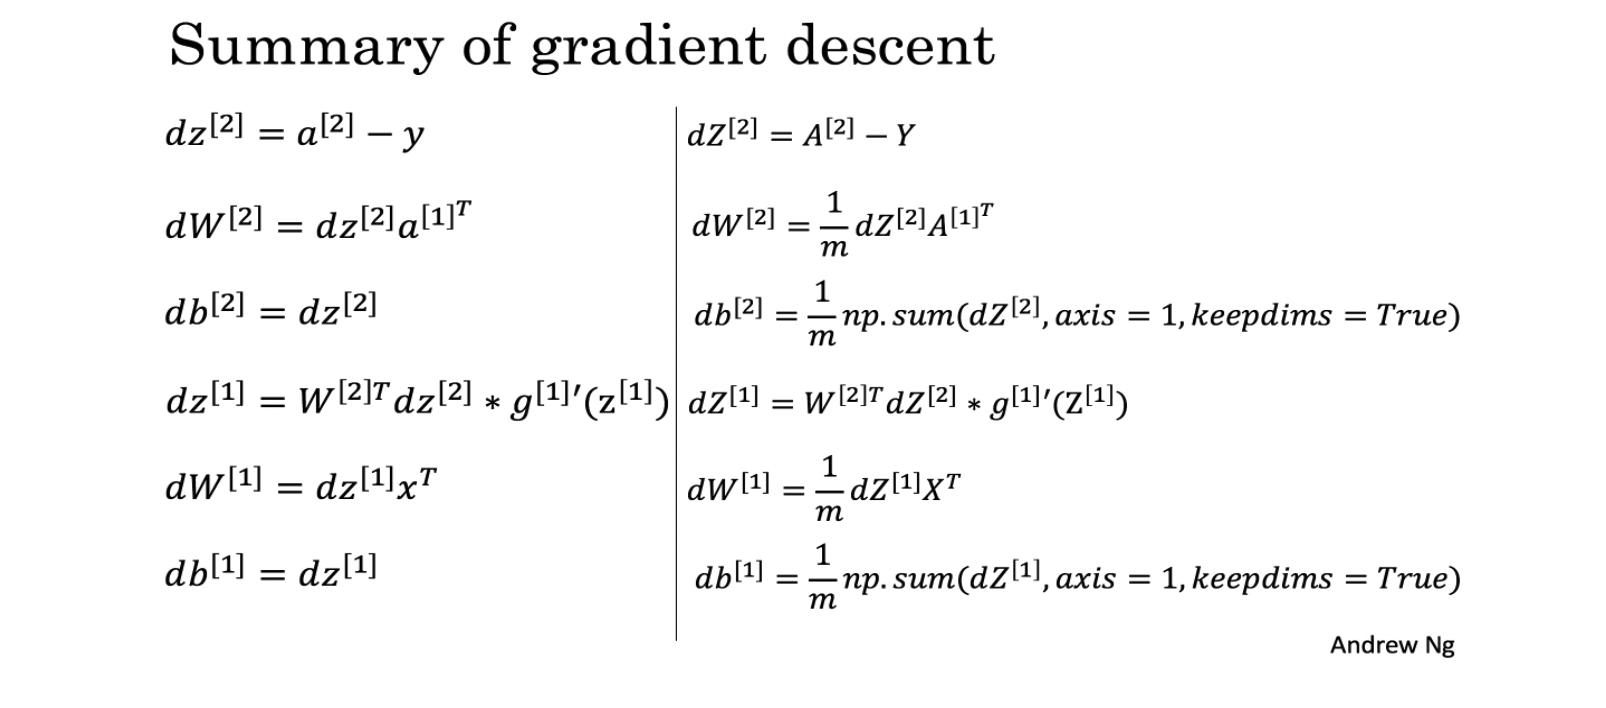


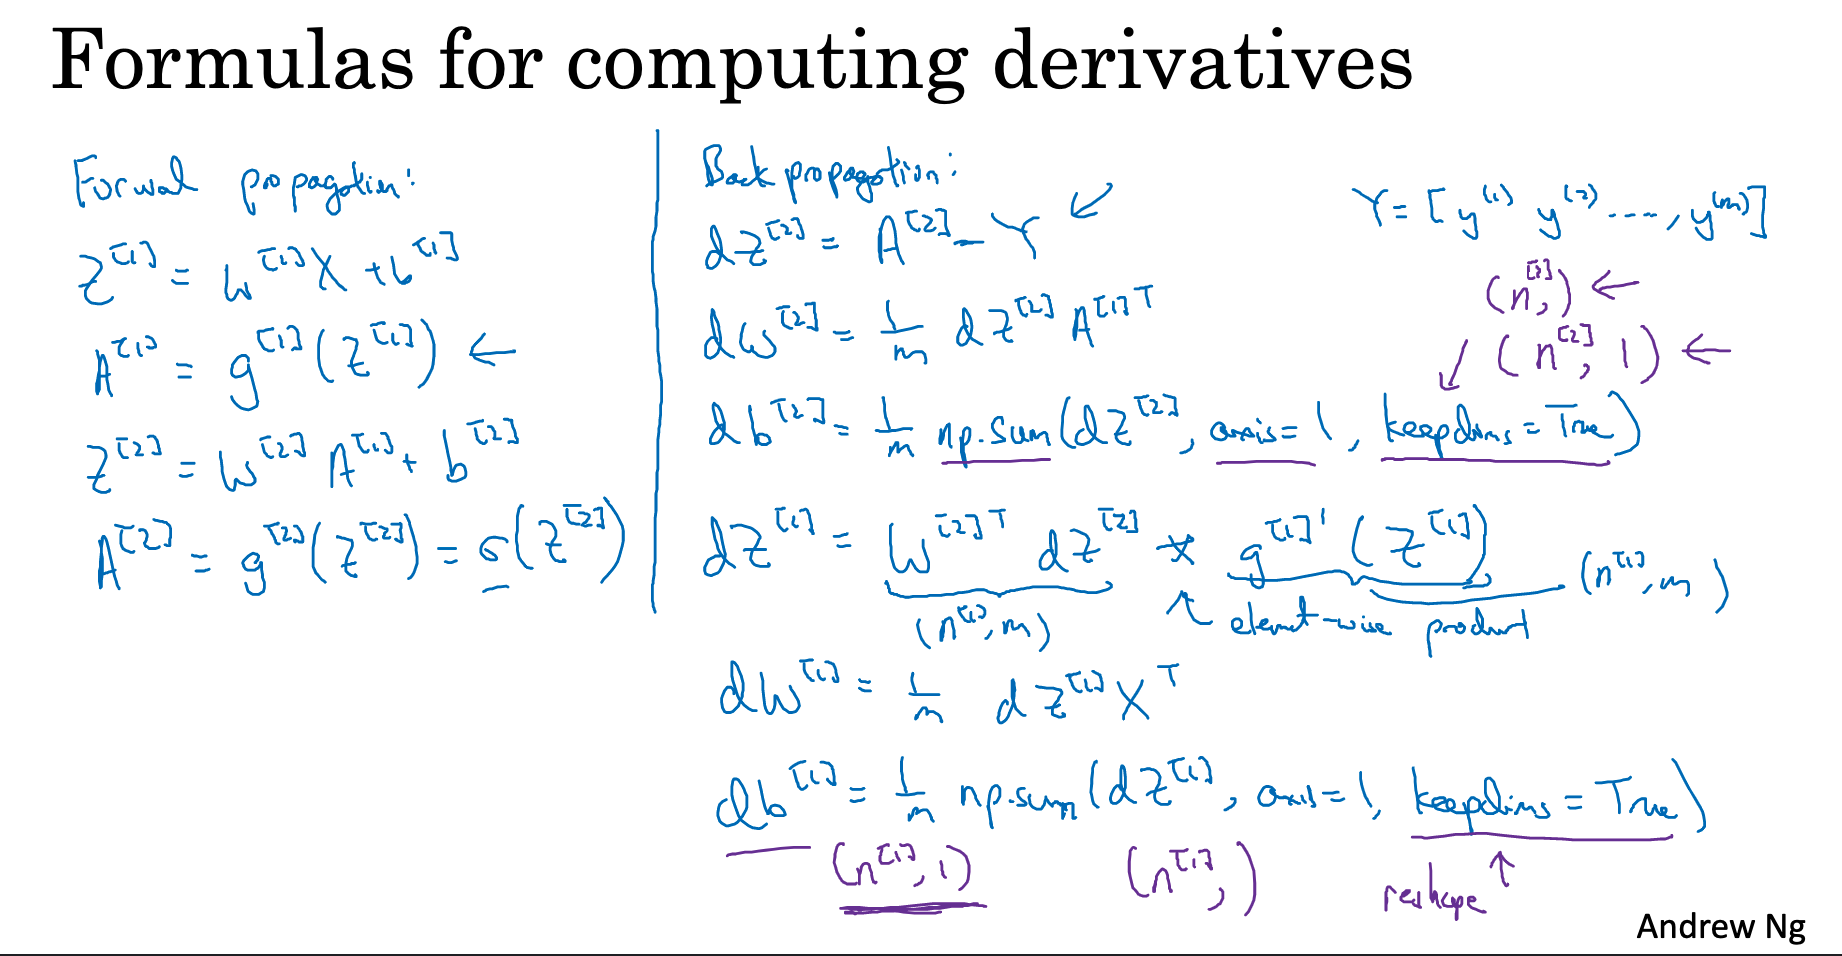



**上面是反向传播过程中用到的公式**

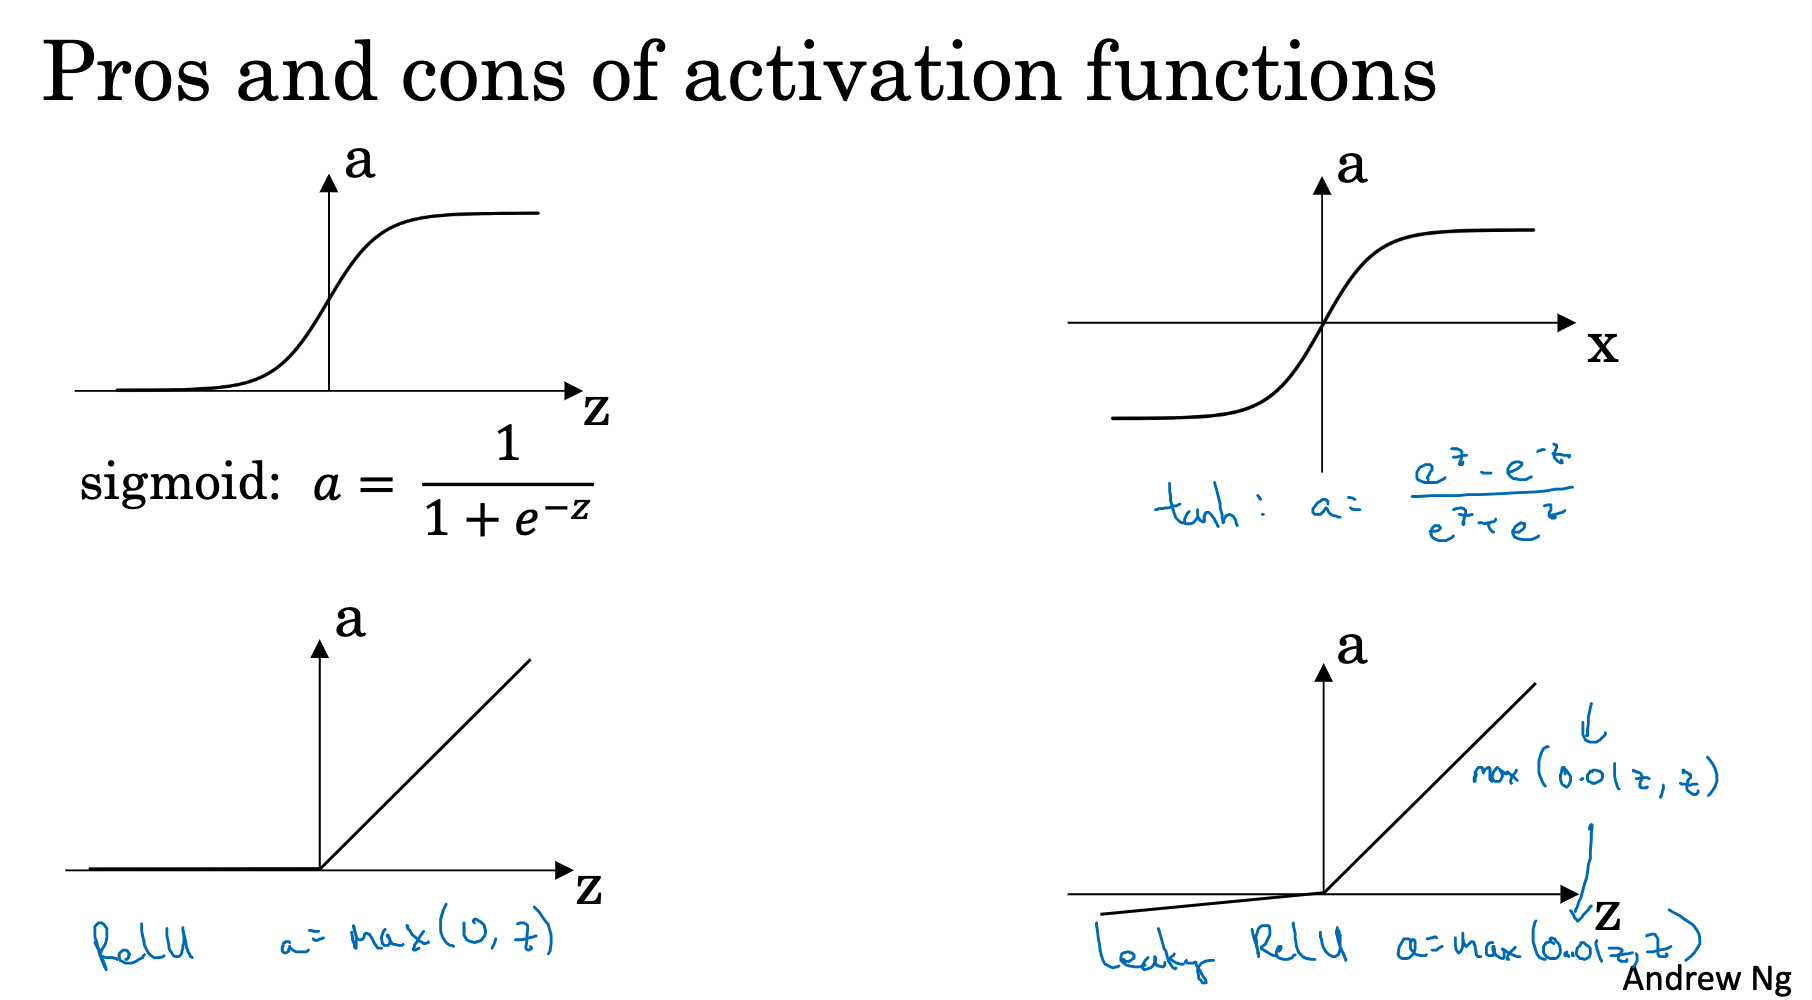

**上面是常用的激活函数，我这里用的是tanh   
对于tanh： $g^{[1]'}(z) = 1-a^2$.**

In [38]:
def backward_propagation( parameters , cache , X , Y ): 
    # 用到的公式 见上方提示
    """
    反向传播函数
    
    参数： 
        parameters : 包含参数的字典
        cache : 包含前向传播过程中的计算值，即Z1 , A1 , Z2 , A2 的字典
        X : 输入数据 ， 本题中的维度为 (2,m)   m : 数量
        Y : 标签(0/1)集，或者说答案集  维度为(1,m)
        
    返回值： 
        grads : 包含Wheb的导数的字典， 即： dW1,dW2,db1,db2等
    """
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot( dZ2 , A1.T )
    db2 = (1/m) * np.sum( dZ2 , axis=1 , keepdims=True )
    dZ1 = np.multiply( np.dot( W2.T , dZ2 ) , 1-np.power(A1 ,2) )
    dW1 = (1/m) * np.dot( dZ1 , X.T)
    db1 = (1/m) * np.sum( dZ1 , axis=1 , keepdims=True )
    
    grabs = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    
    return grabs
    
    

In [39]:
#测试backward_propagation
print("=========================测试backward_propagation=========================")
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()  # 数据来自 testCases

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
Y_assess


=========================测试backward_propagation=========================
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


array([[ 1.74481176, -0.7612069 ,  0.3190391 ]])

**这里强调一点关于学习率的内容，学习率要选择合适大小，过小导致学习过慢，过大会导致无法正常学习**

#### 借鉴一下Adam Harley的图来形象的看一下这个过程

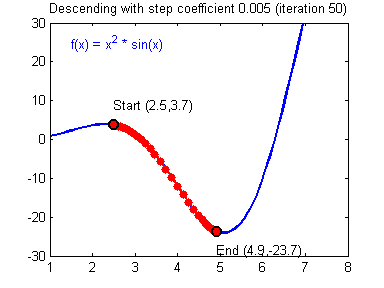

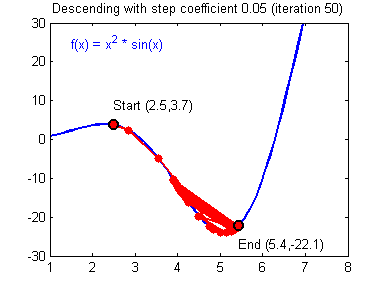


In [40]:
def update_parameters( parameters , grads , learning_rate = 1.2 ):
    """
    参数： 
        parameters ： 字典， 包含参数
        grads ： 字典， 包含导数
        learning_rate ： 学习率 
    
    返回： 
        parameters : 字典 ， 包含更新后的参数
    """
    
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }
    
    return parameters

In [43]:
#测试update_parameters
print("=========================测试update_parameters=========================")
parameters, grads = update_parameters_test_case() # 来自testCases
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


=========================测试update_parameters=========================
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [44]:
def nn_model( X , Y , n_h , num_iterations , print_cost = False ) :
    """
    参数： 
        X : 数据集 维度为(2,m)   m: 数量
        Y : 标签(0/1)集, 维度为(1,m)
        n_h : 隐藏层的单元数 ， 这里只有一个隐藏层
        num_iterations : 迭代次数
        print_cost : 是否要输出迭代成本   （默认1000次迭代，打印一次）
        
    返回值: 
        parameters : 训练得出的参数，可用其进行预测
    
    """
    np.random.seed(3) # 指定随机种子
    n_x = layer_sizes( X , Y )[0]
    n_y = layer_sizes( X , Y )[2]
    
    parameters = initialize_parameters(n_x , n_h ,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 迭代
    for i in range(num_iterations): 
        A2 , cache = foward_propagation(X , parameters)
        cost = compute_cost(A2 , Y , parameters)
        grads = backward_propagation( parameters , cache , X , Y )
        parameters = update_parameters( parameters , grads , learning_rate=0.5 )
        
        if print_cost :
            if i%1000 == 0 :
                print( "第 ",i," 次循环，成本为： "+str(cost) )

    
    return parameters

In [45]:
#测试nn_model
print("=========================测试nn_model=========================")
X_assess, Y_assess = nn_model_test_case() # 来自 testCases

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


=========================测试nn_model=========================


<ipython-input-36-ca163af1fcee>:17: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply( np.log(A2) , Y  ) + np.multiply( ( 1-Y ) , np.log( 1-A2 ) )
/Users/chenchangming/Desktop/大二/人工智能学习/Untitled Folder 1/homework2/planar_utils.py:25: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-3.89167767  4.77541602]
 [-6.77960338  1.20272585]
 [-3.88338966  4.78028666]
 [ 6.77958203 -1.20272574]]
b1 = [[ 2.11530892]
 [ 3.41221357]
 [ 2.11585732]
 [-3.41221322]]
W2 = [[-2512.9093032  -2502.70799785 -2512.01655969  2502.65264416]]
b2 = [[-22.29071761]]


In [46]:
def predict( parameters , X): 
    """
    使用学习后的参数进行预测
    参数： 
        parameters : 包含参数的字典
        X : 输入数据，维数为(n_x , m)  m: 示例数
    
    返回： 
        predictions : 预测结果
    """
        
    
    A2 , cache = foward_propagation( X ,parameters )
    predictions = np.round(A2)
    
    return predictions

In [47]:
#测试predict
print("=========================测试predict=========================")

parameters, X_assess = predict_test_case()
predictions = predict(parameters , X_assess)

print("预测的平均值 = " + str(np.mean(predictions)))


=========================测试predict=========================
预测的平均值 = 0.6666666666666666


第  0  次循环，成本为： 0.6930480201239823
第  1000  次循环，成本为： 0.3098018601352803
第  2000  次循环，成本为： 0.2924326333792646
第  3000  次循环，成本为： 0.2833492852647412
第  4000  次循环，成本为： 0.27678077562979253
第  5000  次循环，成本为： 0.2634715508859331
第  6000  次循环，成本为： 0.24204413129940774
第  7000  次循环，成本为： 0.23552486626608768
第  8000  次循环，成本为： 0.2314096450985428
第  9000  次循环，成本为： 0.22846408048352365
准确率: 90%


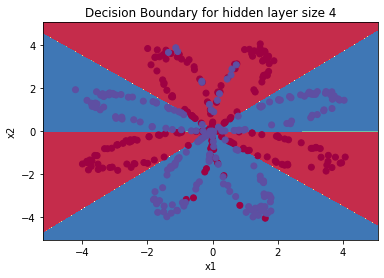

In [48]:
# parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True) #训练
parameters = nn_model(X , Y , n_h=4 , num_iterations=10000 , print_cost=True) # 训练

#绘制边界
plot_decision_boundary( lambda x: predict(parameters , x.T ) , X , Y )
plt.title("Decision Boundary for hidden layer size " + str(4)) # 标题

predictions = predict(parameters , X )

print ('准确率: %d' % float( (np.dot( Y , predictions.T ) + np.dot( 1-Y , 1-predictions.T ) ) / float(Y.size) * 100 )+ '%'  )


####   现在尝试不同的隐藏层单元数

隐藏层的节点数量： 1  ，准确率: 67.25 %
隐藏层的节点数量： 2  ，准确率: 66.5 %
隐藏层的节点数量： 3  ，准确率: 89.25 %
隐藏层的节点数量： 4  ，准确率: 90.0 %
隐藏层的节点数量： 5  ，准确率: 89.75 %
隐藏层的节点数量： 20  ，准确率: 90.0 %
隐藏层的节点数量： 50  ，准确率: 89.75 %


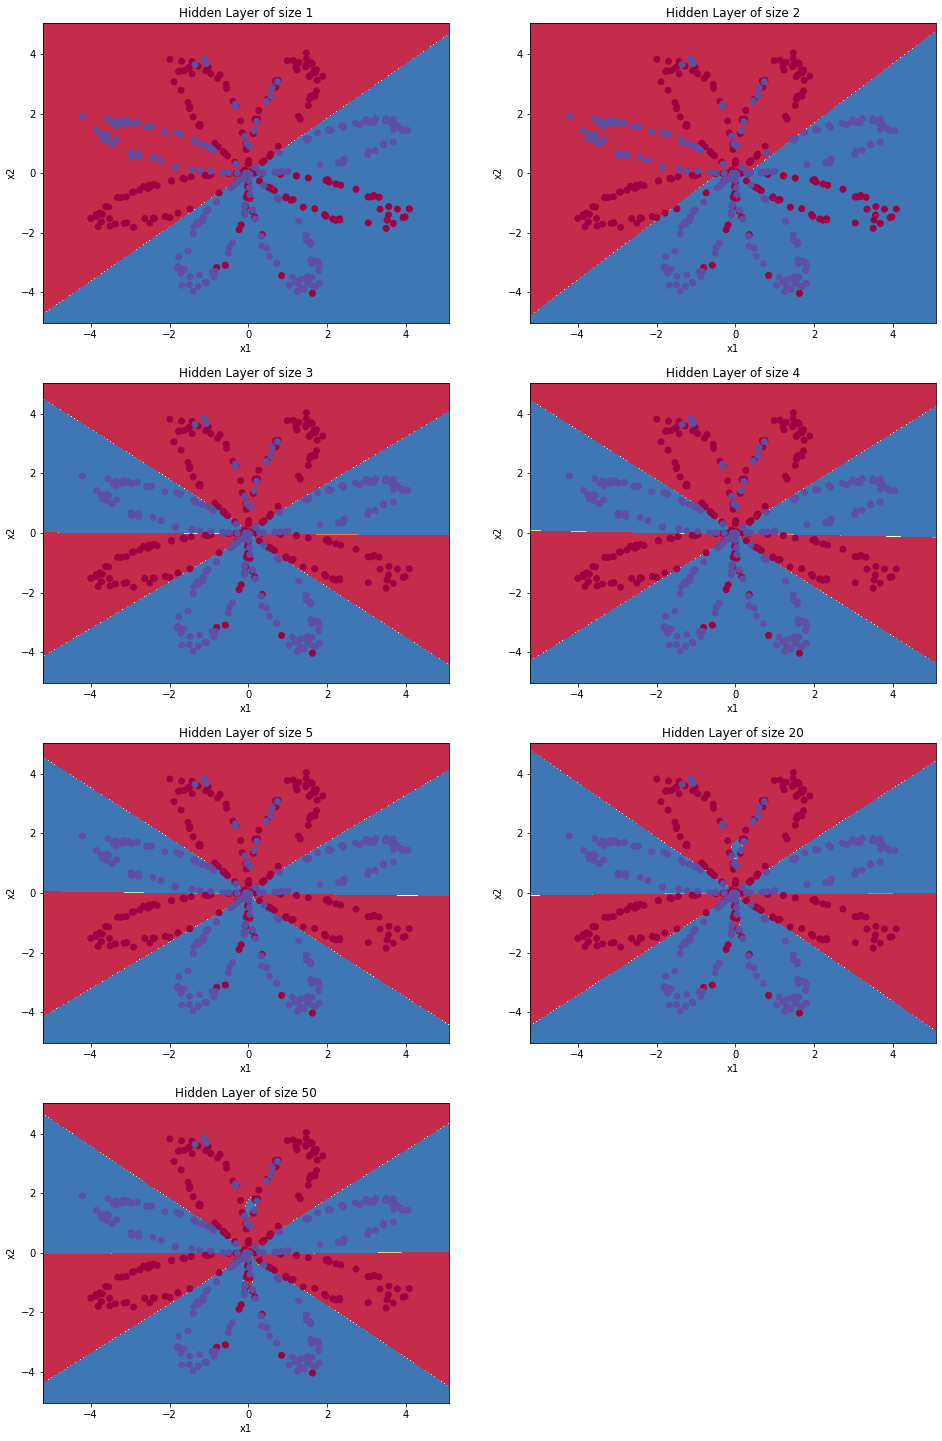

In [49]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] #隐藏层单元量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, accuracy))


```python
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
```

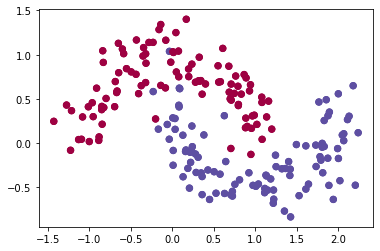

In [50]:
# 数据集
noisy_circles , noisy_moons , blobs , gaussian_quantiles , no_structure = load_extra_datasets()  # 加载另一组数据


datasets = {
    "noisy_circles" : noisy_circles ,
    "noisy_moons" : noisy_moons , 
    "blobs" : blobs , 
    "gaussian_quantiles" : gaussian_quantiles
}


dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if dataset == "blobs":
    Y = Y % 2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

#上一语句如出现问题请使用下面的语句：
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)


# 改变数据

第  0  次循环，成本为： 0.69299178402179
第  1000  次循环，成本为： 0.28217177566322016
第  2000  次循环，成本为： 0.278459009620463
第  3000  次循环，成本为： 0.08394218429371922
第  4000  次循环，成本为： 0.07428858131850316
第  5000  次循环，成本为： 0.06878155572203748
第  6000  次循环，成本为： 0.06595348593463045
第  7000  次循环，成本为： 0.0641715251099812
第  8000  次循环，成本为： 0.06289720701382807
第  9000  次循环，成本为： 0.06190978267739323
准确率: 98%


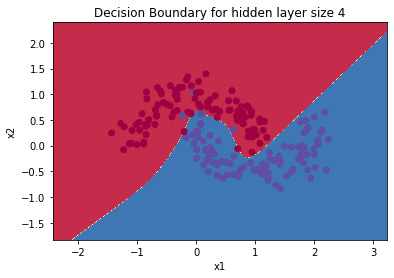

In [51]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


####  声明： 本人参考了[Kulbear](https://github.com/Kulbear/deep-learning-coursera) 的github上的文章 ，加以自己理解，编写了本篇内容。尽力让人轻松理解课程内容及作业